Nama : Agung Rizky S

Kelas : TI-3C

Nim : 2241720187

Github : https://github.com/agungrizkysetiawan/PembelajaranMesin.git

# JOBSHEET 11 Convolutional Neural Network (CNN)

# **Praktikum 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Langkah 1 - Import Library

In [ ]:
import tensorflow as tf

# Instead of:
# from keras.preprocessing.image import ImageDataGenerator

# Use:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1666 images belonging to 2 classes.


# Langkah 3 - Pembuatan Model CNN

Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 2957s 12s/step - accuracy: 0.5121 - loss: 0.7090 - val_accuracy: 0.6345 - val_loss: 0.6667
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 87s 341ms/step - accuracy: 0.6529 - loss: 0.6362 - val_accuracy: 0.7065 - val_loss: 0.5665
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 341ms/step - accuracy: 0.6773 - loss: 0.5973 - val_accuracy: 0.7431 - val_loss: 0.5372
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 346ms/step - accuracy: 0.7278 - loss: 0.5494 - val_accuracy: 0.7449 - val_loss: 0.5158
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 342ms/step - accuracy: 0.7353 - loss: 0.5210 - val_accuracy: 0.7605 - val_loss: 0.4921
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 345ms/step - accuracy: 0.7499 - loss: 0.5028 - val_accuracy: 0.7551 - val_loss: 0.4971
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 88s 345ms/step - accuracy: 0.7531 - loss: 0.4970 - val_accuracy: 0.7773 - val_loss: 0.4685
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 86s 339ms/step - accuracy: 0.7767 - loss: 0.4665 -


# Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
dog


# **Praktikum 2**


# Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Langkah 3 - Verifikasi Data

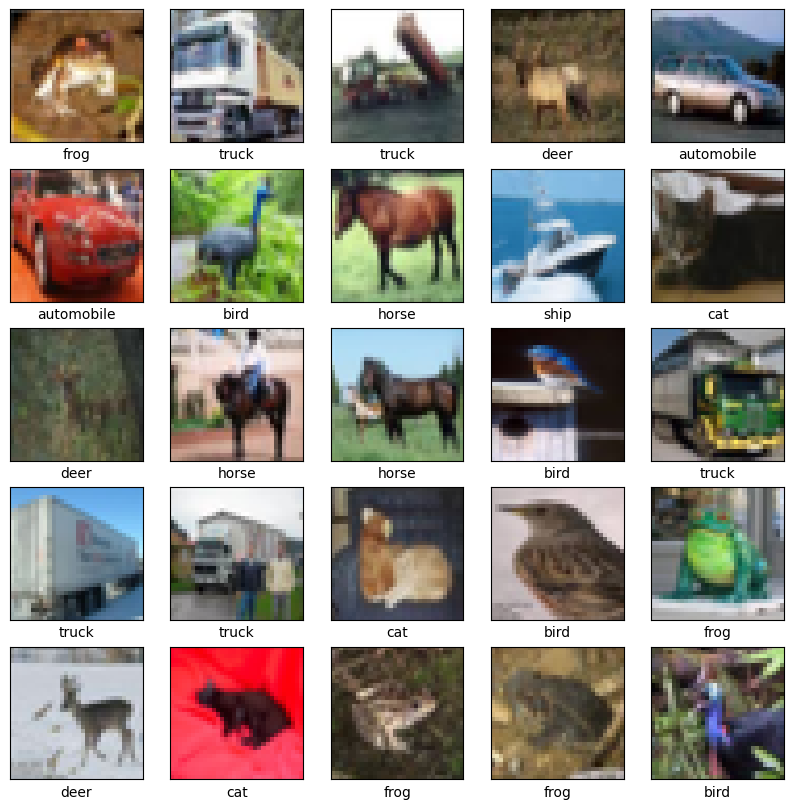

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
     # The CIFAR labels happen to be arrays,
     # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Langkah 4 - Buat Model CNN


Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)


Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)


Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Langkah 5 - Fit Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3447 - loss: 1.7516 - val_accuracy: 0.5303 - val_loss: 1.2916
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.5733 - loss: 1.2134 - val_accuracy: 0.6027 - val_loss: 1.1185
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6256 - loss: 1.0548 - val_accuracy: 0.6429 - val_loss: 1.0185
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 48ms/step - accuracy: 0.6631 - loss: 0.9543 - val_accuracy: 0.6597 - val_loss: 0.9693
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.6881 - loss: 0.8840 - val_accuracy: 0.6732 - val_loss: 0.9412
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.7065 - loss: 0.8312 - val_accuracy: 0.6814 - val_loss: 0.9182
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7267 - loss: 0.7750 - val_accuracy: 0.6774 - val_loss: 0.9512
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7376 -


# Langkah 6 - Evaluasi Model

313/313 - 5s - 16ms/step - accuracy: 0.7011 - loss: 0.8634


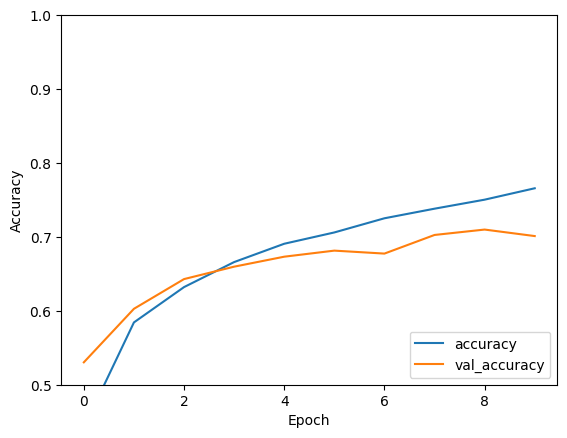

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.7010999917984009



# **Tugas**


# Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [ ]:
model_2 =  models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

ValueError: You must call `compile()` before using the model.

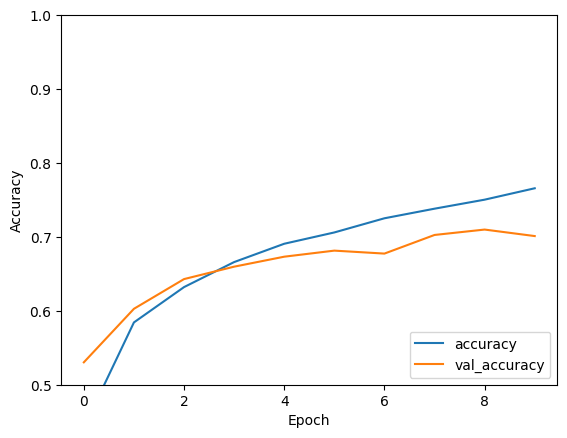

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_2.evaluate(test_images, test_labels, verbose=2)

In [ ]:
model_3 =  models.Sequential()

model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(1024, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,025,930 (15.36 MB)

 Trainable params: 4,021,130 (15.34 MB)

 Non-trainable params: 4,800 (18.75 KB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1012s 643ms/step - accuracy: 0.4478 - loss: 1.6200 - val_accuracy: 0.5614 - val_loss: 1.4316
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1034s 638ms/step - accuracy: 0.7092 - loss: 0.8435 - val_accuracy: 0.7061 - val_loss: 0.8562
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1017s 622ms/step - accuracy: 0.7823 - loss: 0.6344 - val_accuracy: 0.7399 - val_loss: 0.7678
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 971s 621ms/step - accuracy: 0.8286 - loss: 0.5044 - val_accuracy: 0.8132 - val_loss: 0.5474
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1021s 646ms/step - accuracy: 0.8654 - loss: 0.3904 - val_accuracy: 0.8020 - val_loss: 0.6124
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1043s 647ms/step - accuracy: 0.8939 - loss: 0.3076 - val_accuracy: 0.8302 - val_loss: 0.5463
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1005s 623ms/step - accuracy: 0.9203 - loss: 0.2303 - val_accuracy: 0.8135 - val_loss: 0.6306
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 972s 622ms/step - accurac

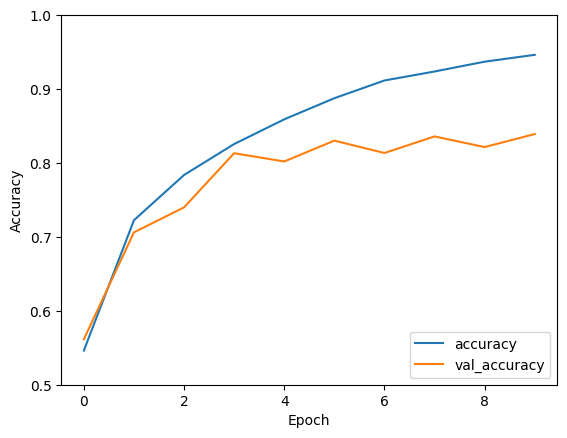

In [ ]:
model_3.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model_3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

test_loss, test_acc = model_3.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Buatlah model CNN untuk klasifikasi dataset MNIST.

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 56ms/step - accuracy: 0.8695 - loss: 0.4300 - val_accuracy: 0.9779 - val_loss: 0.0679
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9845 - loss: 0.0520 - val_accuracy: 0.9887 - val_loss: 0.0364
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9891 - loss: 0.0358 - val_accuracy: 0.9859 - val_loss: 0.0481
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9908 - loss: 0.0281 - val_accuracy: 0.9898 - val_loss: 0.0309
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.9943 - loss: 0.0200 - val_accuracy: 0.9907 - val_loss: 0.0285
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9873 - loss: 0.0372
Test accuracy: 0.9907000064849854
